In [3]:
Business Objective :

Maximized:
Customer Satisfaction: Improve customer experience by addressing their preferences and feedback.
Sales and Profitability: Boost revenue by aligning products with consumer expectations and increasing customer loyalty.

Minimized:
Customer Dissatisfaction: Reduce negative feedback and complaints by solving issues proactively.
Product Issues: Minimize defects and flaws through continuous product improvements based on customer insights.

Constraints:
Data Availability and Quality: Limited access to relevant, clean, and structured reviews.
Language Diversity: Handling multiple languages, slang, and abbreviations in reviews.
Model Accuracy: Difficulty in interpreting sarcasm, irony, and context in sentiment analysis.

SyntaxError: invalid syntax (3820262695.py, line 1)

In [5]:
#First we will go for web scraping .
#We will scrap the reviews of the movie Oppenhiemer.
#We will web scarp review of movie oppenheimer from which we will scrap 1.Title of review , 2.Rating of the movie , 3. Body of the Review

In [74]:
#Defining the libraries that will be required for web scraping  
import pandas as pd
import bs4
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
page=requests.get("https://www.imdb.com/title/tt15398776/reviews/?ref_=tt_ql_2")
page
page.content
soup=bs(page.content,"html.parser")
print(soup.prettify)
#By requests.get we will get access to the review page of the movie

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Oppenheimer (2023) - Oppenheimer (2023) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt15398776/reviews/" rel="canonical"/>
<meta content="http://www.imdb.com/title/tt15

In [10]:
#Here we will Extarct our Review Title which is having <a> tag and class as aa "title"
title=soup.find_all('a',class_="title")
title

[<a class="title" href="/review/rw9199470/"> Murphy is exceptional
 </a>,
 <a class="title" href="/review/rw9202448/"> A challenging watch to be sure, but a worthwhile one.
 </a>,
 <a class="title" href="/review/rw9205066/"> Quality but exhausting
 </a>,
 <a class="title" href="/review/rw9199448/"> And the Oscar goes to...
 </a>,
 <a class="title" href="/review/rw9202246/"> A brilliantly layered examination of a man throughout all of his incredible accomplishments and fundamental flaws
 </a>,
 <a class="title" href="/review/rw9205442/"> Is it just me ?
 </a>,
 <a class="title" href="/review/rw9216587/"> Nolan touches greatness, falls slightly short
 </a>,
 <a class="title" href="/review/rw9218393/"> Severely overhyped
 </a>,
 <a class="title" href="/review/rw9200581/"> A Cinematic Masterpiece by Christopher Nolan
 </a>,
 <a class="title" href="/review/rw9200792/"> A Masterpiece
 </a>,
 <a class="title" href="/review/rw9213385/"> This just might be as interesting as this topic can get
 

In [11]:
#We have extracted title but it is not clean now we will clean the title
review_title=[]
for i  in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title
review_title[:]=[title.strip('\n') for title in review_title]
review_title

[' Murphy is exceptional',
 ' A challenging watch to be sure, but a worthwhile one.',
 ' Quality but exhausting',
 ' And the Oscar goes to...',
 ' A brilliantly layered examination of a man throughout all of his incredible accomplishments and fundamental flaws',
 ' Is it just me ?',
 ' Nolan touches greatness, falls slightly short',
 ' Severely overhyped',
 ' A Cinematic Masterpiece by Christopher Nolan',
 ' A Masterpiece',
 ' This just might be as interesting as this topic can get',
 ' Nolan delivers a powerfull biopic that shows the dark side of human nature!',
 ' Breaks all filmmaklng rules, but not in a good way',
 ' Highly overrated',
 ' Nolan at his best!',
 ' Mixed feelings',
 ' Exceptional storytelling and Genius Cinametography',
 ' Simply amazing',
 ' Cinematic masterpiece',
 ' Technically superb but...',
 ' Quite boring',
 " Good movie, but don't let Nolan fans fool you.",
 ' Too loud and too long',
 ' Less would have been more',
 ' Oppen-bore-mer']

In [15]:
len(review_title)  #Checking the length of review title

25

In [17]:
#now let us scrap rating
rating=soup.find_all('span',class_='rating-other-user-rating')
rating
rate=[]
for i  in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate
rate[:]=[r.strip('\n\n\n\n\n\n') for r in rate]
rate=[r.replace('/10', '') for r in rate]
rate


['9',
 '8',
 '7',
 '10',
 '10',
 '8',
 '8',
 '10',
 '10',
 '6',
 '10',
 '6',
 '5',
 '9',
 '9',
 '8',
 '10',
 '8',
 '6',
 '8',
 '6',
 '5']

In [19]:
#Balancing both
len(rate)
rate.append('')
rate.append('')
rate.append('')
len(rate)         

25

In [21]:
#Let us scrap the review body
review=soup.find_all('div',class_='text show-more__control')
review
review_body=[]
for i  in range(0,len(review)):
    review_body.append(review[i].get_text())
review_body


["You'll have to have your wits about you and your brain fully switched on watching Oppenheimer as it could easily get away from a nonattentive viewer. This is intelligent filmmaking which shows it's audience great respect. It fires dialogue packed with information at a relentless pace and jumps to very different times in Oppenheimer's life continuously through it's 3 hour runtime. There are visual clues to guide the viewer through these times but again you'll have to get to grips with these quite quickly. This relentlessness helps to express the urgency with which the US attacked it's chase for the atomic bomb before Germany could do the same. An absolute career best performance from (the consistenly brilliant) Cillian Murphy anchors the film. This is a nailed on Oscar performance. In fact the whole cast are fantastic (apart maybe for the sometimes overwrought Emily Blunt performance). RDJ is also particularly brilliant in a return to proper acting after his decade or so of calling it

In [23]:
len(review_body)  #Checking the length of review body

25

In [25]:
#create a dataframe
import pandas as pd
df=pd.DataFrame()
df['Review_title']=review_title
df['Rate']=rate
df['Review']=review_body
df

,Review_title,Rate,Review
0,Murphy is exceptional,9,You'll have to have your wits about you and yo...
1,"A challenging watch to be sure, but a worthwh...",8,One of the most anticipated films of the year ...
2,Quality but exhausting,7,I'm a big fan of Nolan's work so was really lo...
3,And the Oscar goes to...,10,I'm still collecting my thoughts after experie...
4,A brilliantly layered examination of a man th...,10,"""Oppenheimer"" is a biographical thriller film ..."
5,Is it just me ?,8,Is it just me or did anyone else find this mov...
6,"Nolan touches greatness, falls slightly short",8,I was familiar with the Manhattan project and ...
7,Severely overhyped,10,I align with other reviewers here who have fou...
8,A Cinematic Masterpiece by Christopher Nolan,10,"After a busy career filled with masterpieces, ..."
9,A Masterpiece,6,I may consider myself lucky to be alive to wat...


In [29]:
#now create csv file
df.to_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\IMDb_reviews2.csv",index=True)

In [33]:
#first we will check data dictionary

In [35]:

set(df["Review_title"])
#looking at the output we can say that it is Qualitative Nominal Type of Data

{' A Cinematic Masterpiece by Christopher Nolan',
 ' A Masterpiece',
 ' A brilliantly layered examination of a man throughout all of his incredible accomplishments and fundamental flaws',
 ' A challenging watch to be sure, but a worthwhile one.',
 ' And the Oscar goes to...',
 ' Breaks all filmmaklng rules, but not in a good way',
 ' Cinematic masterpiece',
 ' Exceptional storytelling and Genius Cinametography',
 " Good movie, but don't let Nolan fans fool you.",
 ' Highly overrated',
 ' Is it just me ?',
 ' Less would have been more',
 ' Mixed feelings',
 ' Murphy is exceptional',
 ' Nolan at his best!',
 ' Nolan delivers a powerfull biopic that shows the dark side of human nature!',
 ' Nolan touches greatness, falls slightly short',
 ' Oppen-bore-mer',
 ' Quality but exhausting',
 ' Quite boring',
 ' Severely overhyped',
 ' Simply amazing',
 ' Technically superb but...',
 ' This just might be as interesting as this topic can get',
 ' Too loud and too long'}

In [37]:
set(df["Rate"])
#from output we can say it is quantitative discreate data

{'', '10', '5', '6', '7', '8', '9'}

In [39]:
set(df["Review"])
#it is Qualitative nominal Data

{'"Oppenheimer" is a biographical thriller film written and directed by Christopher Nolan ("The Dark Knight trilogy", "Inception", "Interstellar", "Dunkirk"), based on the biography "American Prometheus" by Kai Bird and Martin J. Sherwin. Starring Cillian Murphy in the lead role, in addition to Matt Damon, Robert Downey Jr, Emily Blunt, and Florence Pugh, it subverts the usual biopic formula to create a brilliantly layered examination of a man throughout all of his incredible accomplishments and fundamental flaws.During the height of the Second World War, theoretical physicist J. Robert Oppenheimer (Cillian Murphy) is recruited by the United States government to oversee the "Manhattan Project", a top secret operation intended to develop the world\'s first nuclear weapons. After becoming acquainted with the project\'s director Major General Leslie Groves (Matt Damon), Oppenheimer and the General come to an agreement that the best place to carry out such an undertaking is the vast desert

In [41]:
#now we have created Dataset now we will go for Data Preprocessing

In [43]:
df.shape #there are 25 rows and three columns

(25, 3)

In [45]:
df.columns #There are three columns named as 'Review_title','Rate','Review'

Index(['Review_title', 'Rate', 'Review'], dtype='object')

<Axes: ylabel='Rate'>

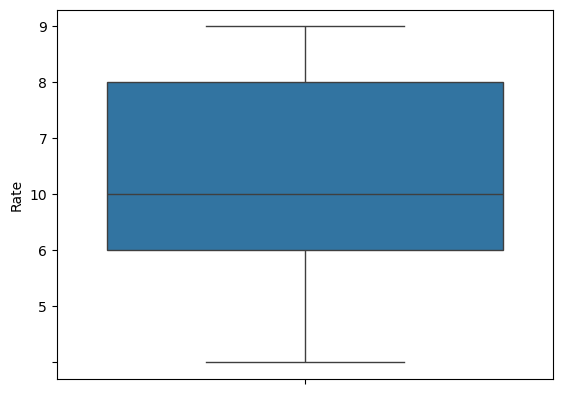

In [61]:
#Now we will check outliers using Boxplot
sns.boxplot(df["Rate"])
#from box plot we can see there are no outliers in the Rate Column

EDA

In [68]:
#first we will check summary of data
df.describe()

,Review_title,Rate,Review
count,25,25,25
unique,25,7,25
top,Murphy is exceptional,8,You'll have to have your wits about you and yo...
freq,1,6,1


In [70]:
#info summary
df.info()
#from this we came to know total columns and thier names , index , datatypes ,memory usage,is there any null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  25 non-null     object
 1   Rate          25 non-null     object
 2   Review        25 non-null     object
dtypes: object(3)
memory usage: 732.0+ bytes


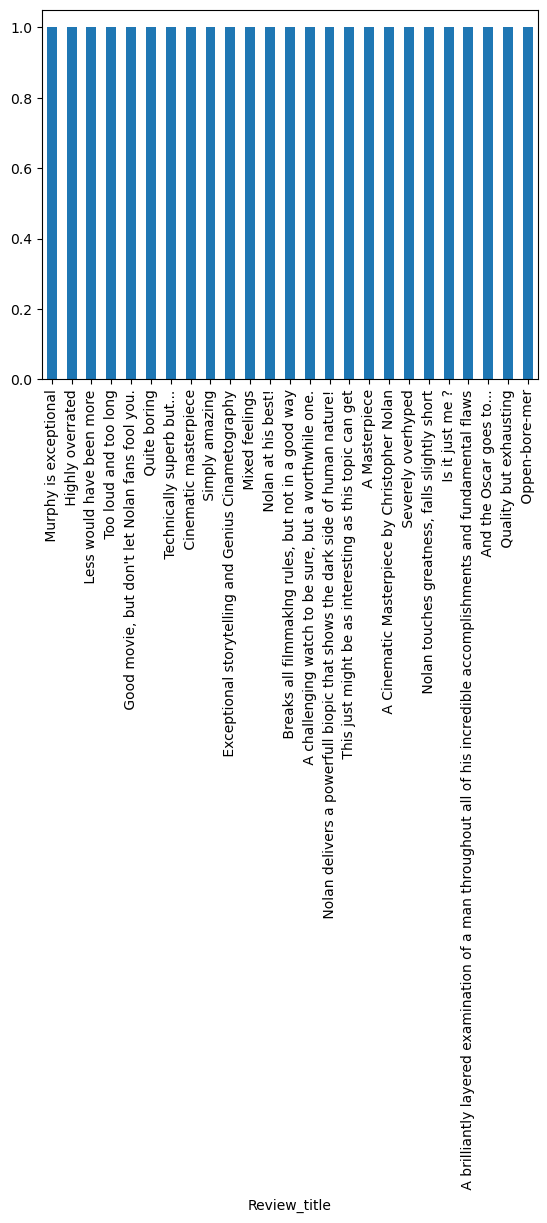

In [76]:
#Now Univariete Analysis
df['Review_title'].value_counts().plot(kind='bar')
plt.show()

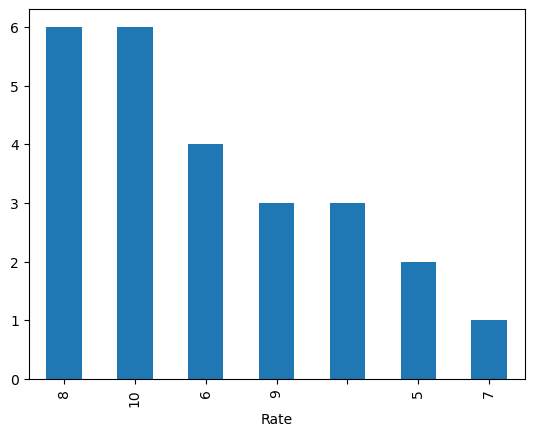

In [84]:
df['Rate'].value_counts().plot(kind='bar')
plt.show()

In [101]:
#Now creating a word cloud 
from wordcloud import WordCloud
text=df["Review_title"]     #first creating a word cloud for Review_title

# Concatenate all text into one string
text = " ".join(Review_title for Review_title in text)

# Generate Word Cloud
wordcloud_Review_title = WordCloud(width=800, height=400, background_color='white').generate(text)

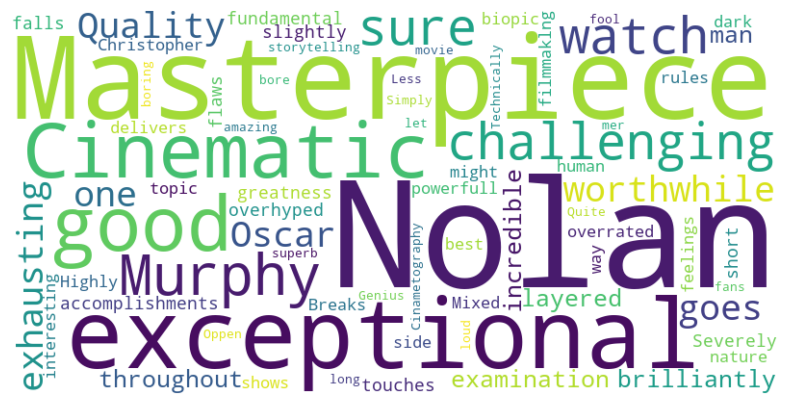

In [103]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review_title, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

#From word cloud we can see that the words which are important & occuring frequantly appear large is size, word cloud eleminates the stopwords completely 
#Here Masterpiece , Nolan, Cinematic , murphy etc are occuring more fraquently so they are bigger in size

In [108]:
text2=df["Review"]     #first creating a word cloud for Reviews

# Concatenate all text into one string
text2 = " ".join(Review for Review in text2)

# Generate Word Cloud
wordcloud_Review = WordCloud(width=800, height=400, background_color='white').generate(text2)

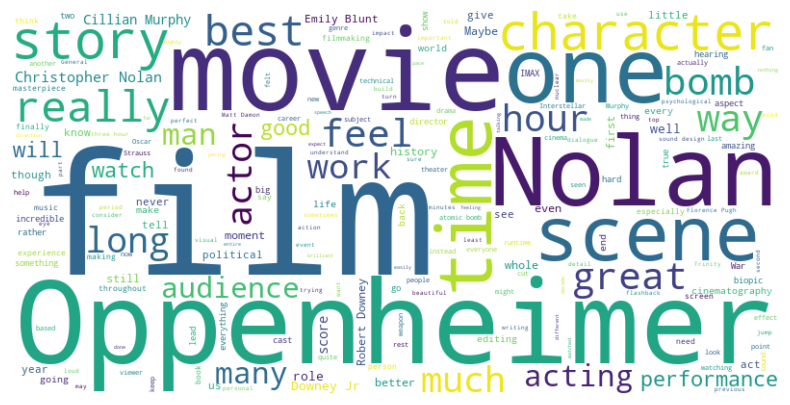

In [110]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

#From word cloud we can see that the words which are important & occuring frequantly appear large is size, word cloud eleminates the stopwords completely 
#Here Movie,film,oppenheimer, Nolan, Cinematic , murphy etc are occuring more fraquently so they are bigger in size

In [127]:
#Sentiment Analysis
import pandas as pd
from textblob import TextBlob
sent="This is excellent movie"
pol=TextBlob(sent).sentiment.polarity
pol
#from this polarity we came to now that word is positive or negative
#Positive Sentiment: Polarity > 0
#Negative Sentiment: Polarity < 0
#Neutral Sentiment: Polarity = 0

1.0

In [131]:
df=pd.read_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\IMDb_reviews2.csv")
df.head()
df['polarity']=df['Review'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
df['polarity']

#From this we came to know sentiment polarity of all the reviews from the data


0     0.337667
1     0.260166
2     0.175588
3     0.225556
4     0.162701
5     0.109792
6     0.190688
7     0.021002
8     0.195481
9     0.234615
10    0.191136
11    0.321563
12    0.055685
13    0.036845
14    0.223918
15    0.199048
16    0.273611
17    0.307941
18    0.356960
19    0.179167
20   -0.068519
21    0.256267
22    0.202083
23    0.038590
24    0.397619
Name: polarity, dtype: float64

In [ ]:
#Benefits and Impact of Solution :
#                                By analyzing reviews of the movie "Oppenheimer," businesses can understand what people liked or didn’t like.
#                                This helps them improve future movies, create better ads, and make decisions based on what the audience enjoys.
#                                It also helps them predict how successful a movie might be and adjust their marketing to attract more viewers.